Heart attack Anaöysis and Prediction


Heart attacks, also known as myocardial infarctions. When a part of the heart muscle doesn't receive an adequate blood supply, it can lead to a heart attack. The longer this condition persists without proper treatment, the more severe the damage to the heart muscle becomes.

Coronary artery disease (CAD) stands as the primary culprit behind most heart attacks. This disease occurs when the arteries that supply blood to the heart become narrowed or blocked due to the buildup of plaque. With millions of lives affected by heart attacks annually, it's imperative to explore predictive models that can assist in identifying individuals at risk.

This dataset comprises crucial medical information about patients, enabling me to assess the likelihood of a heart attack occurrence. By leveraging various machine learning algorithms such as Logistic Regression (LR), Support Vector Machines (SVM), k-Nearest Neighbors (KNN), and Decision Trees (DT), or Random Forest Classifier (RFC) our goal is to develop a robust predictive model. Through this exploration, we aim to determine which algorithm best suits our dataset, ultimately contributing to the ongoing efforts in cardiovascular health prediction.

Data Dictionary

Age: Age of the patient

Sex: Sex of the patient

cp: Chest Pain type chest pain type
    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 4: asymptomatic
    
trtbps: resting blood pressure (in mm Hg)

chol: cholestoral in mg/dl fetched via BMI sensor

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results
    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria.
    
thalachh: maximum heart rate achieved

oldpeak: previous peak

slp: slope

caa: Number of major vessels

thall: Thalium Stress Test result ~ (0,3)

exang: exercise induced angina (1 = yes; 0 = no)

output: 0= less chance of heart attack 1= more chance of heart attack

In [1]:
# We import the necessary libraries 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting the data
# Plot correlation matrix
import seaborn as sns # for plotting the matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px


In [2]:
# open the file and visualize the data in a table

df=pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.shape
print("The shape of the dataset is : ", df.shape)

df.describe()

The shape of the dataset is :  (303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Check for the missing values

df.isnull().sum()


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
print('There is no missing values in the dataset')

df['output'].value_counts()


There is no missing values in the dataset


output
1    165
0    138
Name: count, dtype: int64

In [9]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [10]:
# Let's divide the columns as categorical and continuous

cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]

<function matplotlib.pyplot.show(close=None, block=None)>

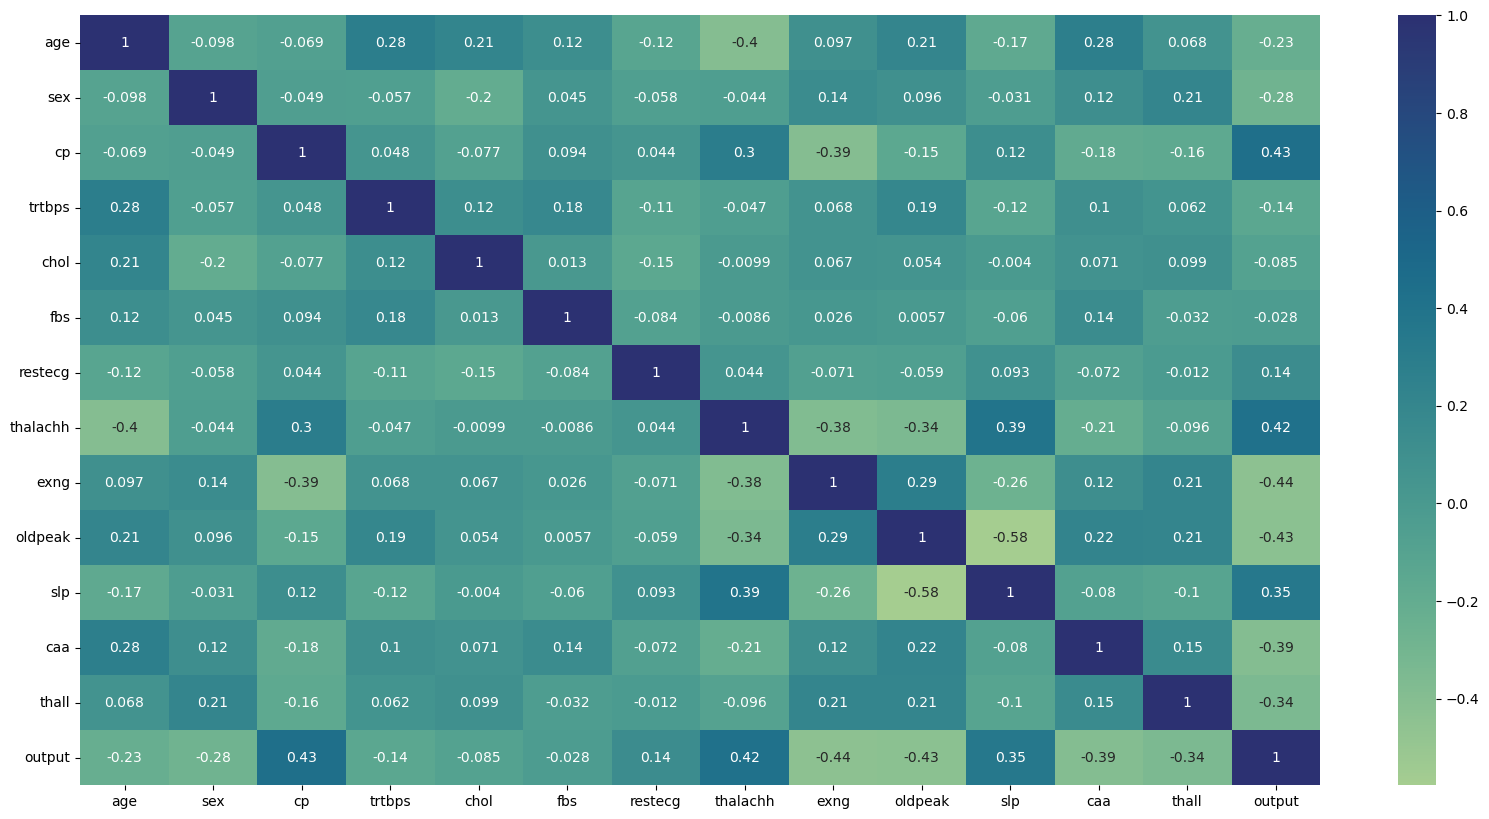

In [11]:
# Plot a correlation matrix to check how feautures are correlated

plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), cmap = 'crest', annot = True)
plt.show

In [12]:
# Calculate correlation coefficients between 'output' and other numerical features
# Drop 'output' variable from correlation matrix
HA_corr = df.drop('output', axis=1).corr().abs()


top_corr_features = HA_corr.unstack().sort_values(ascending=False).drop_duplicates().head(10)

print("Top correlated features:")
print(top_corr_features)

Top correlated features:
age      age         1.000000
slp      oldpeak     0.577537
age      thalachh    0.398522
cp       exng        0.394280
slp      thalachh    0.386784
exng     thalachh    0.378812
oldpeak  thalachh    0.344187
cp       thalachh    0.295762
exng     oldpeak     0.288223
age      trtbps      0.279351
dtype: float64


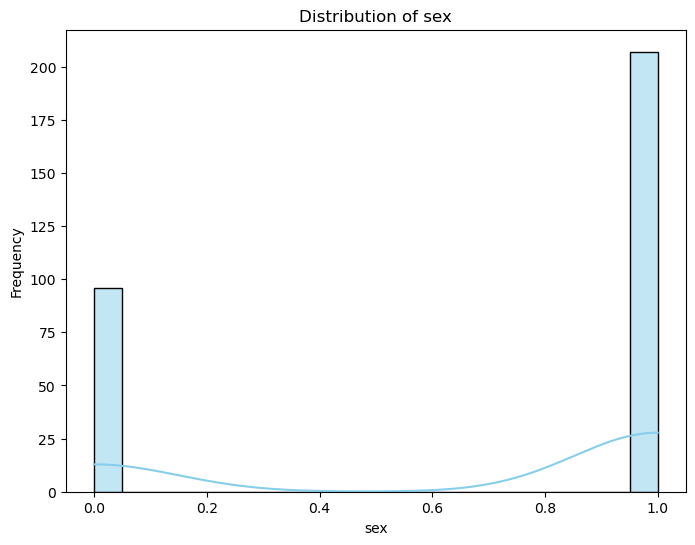

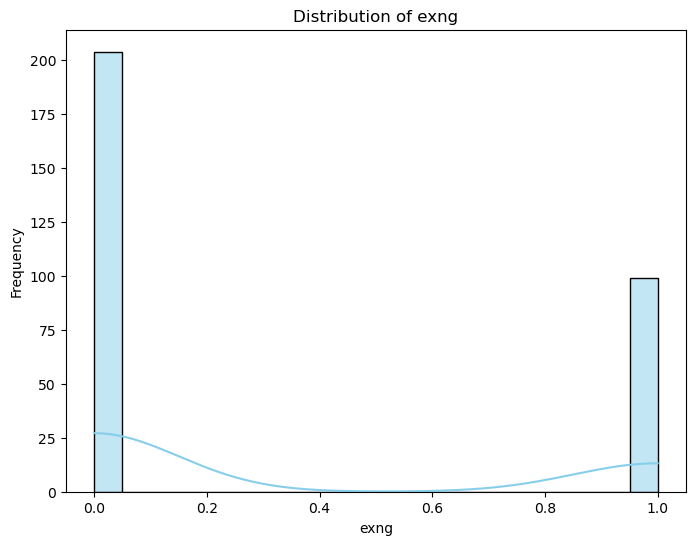

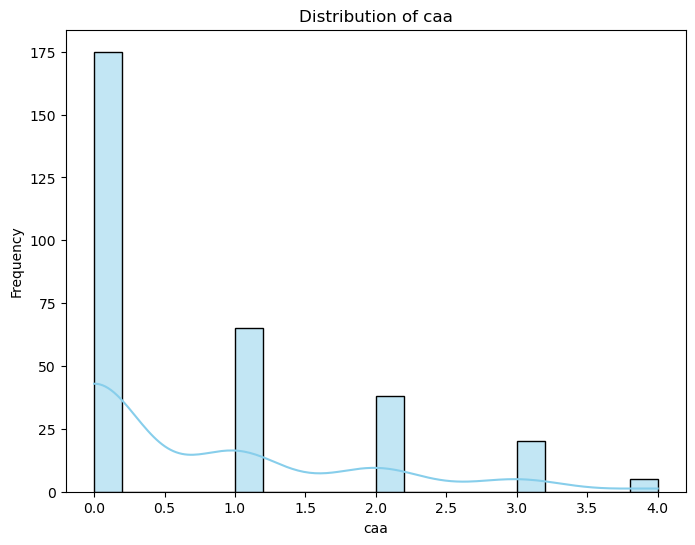

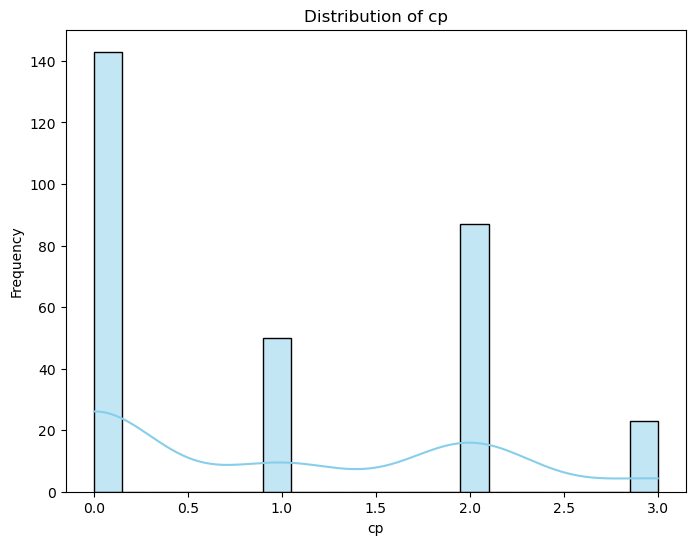

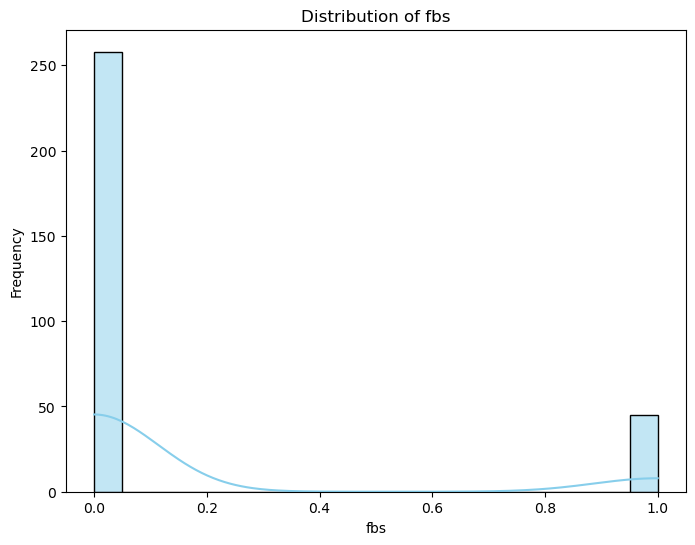

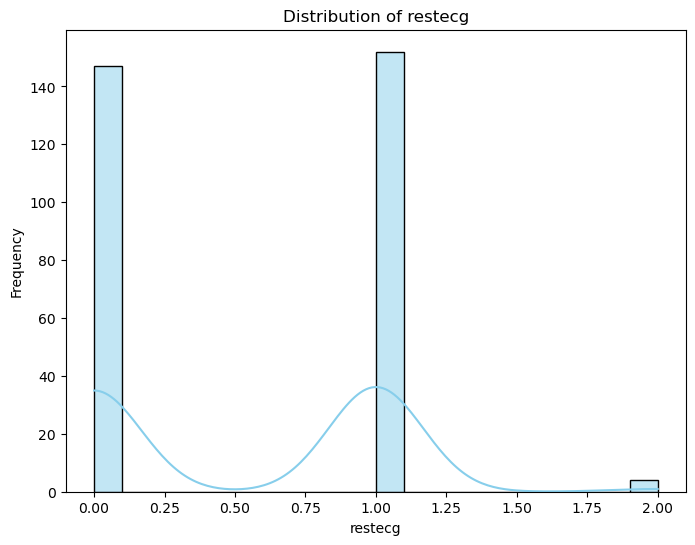

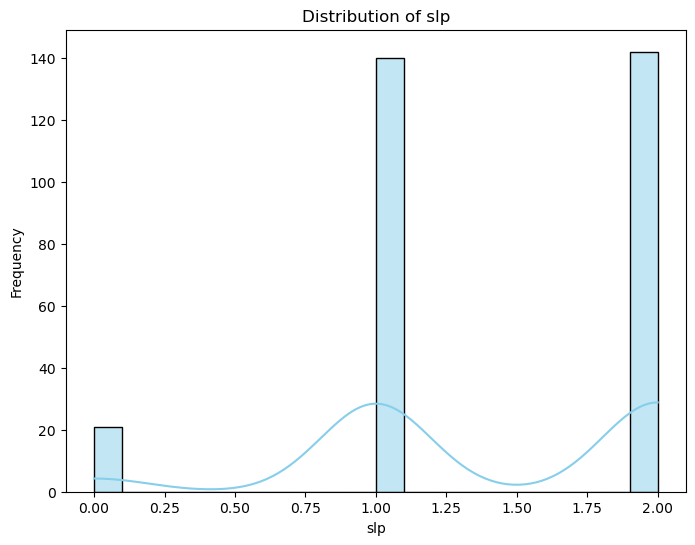

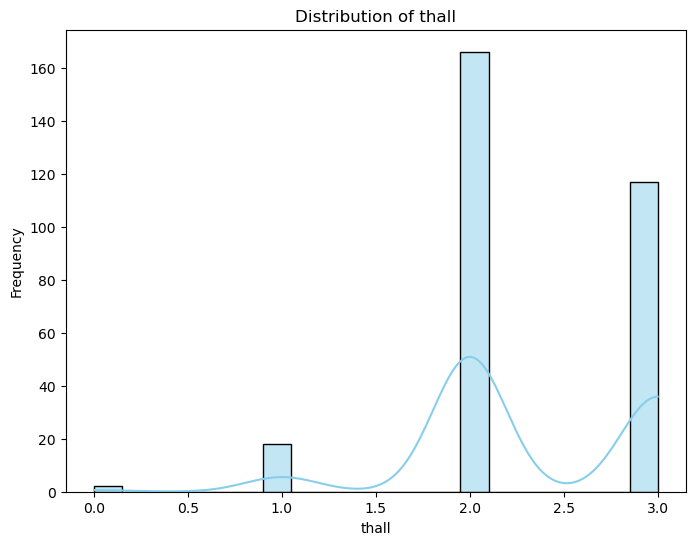

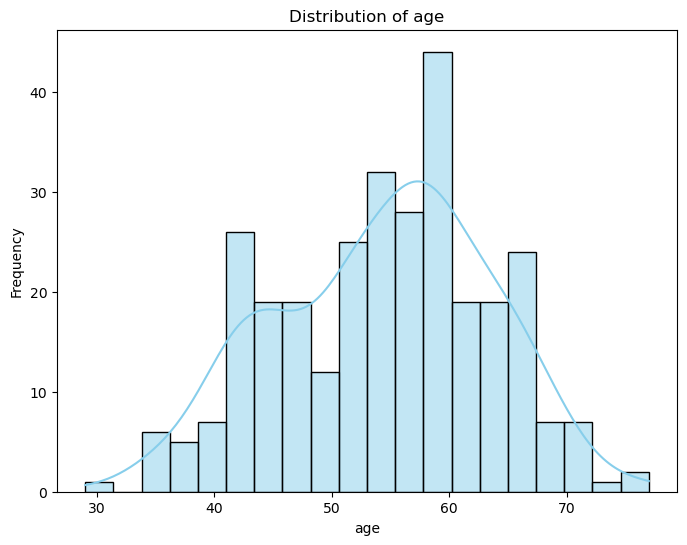

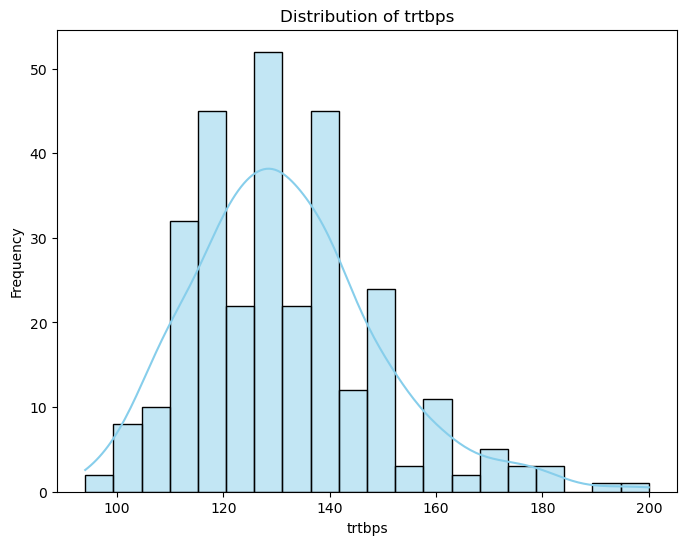

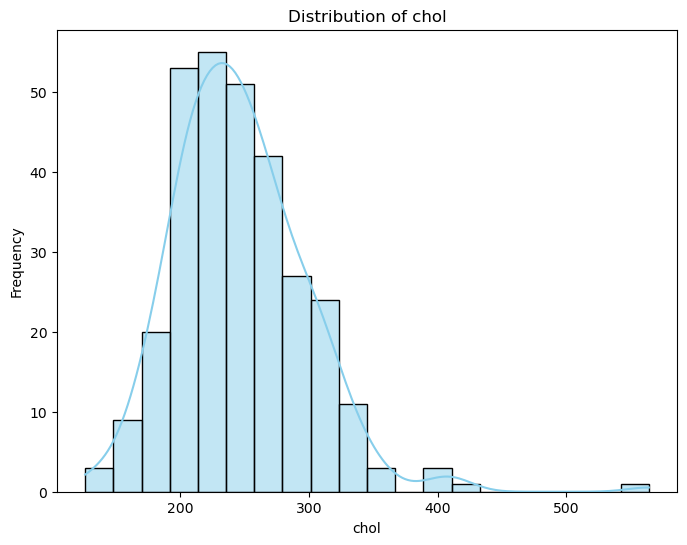

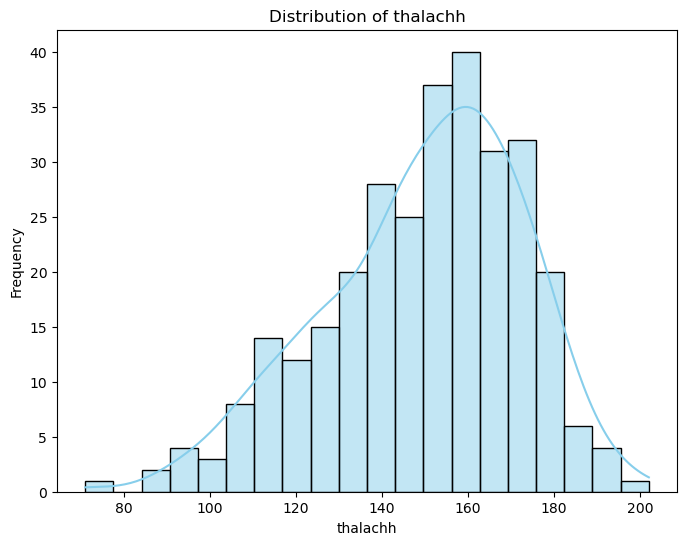

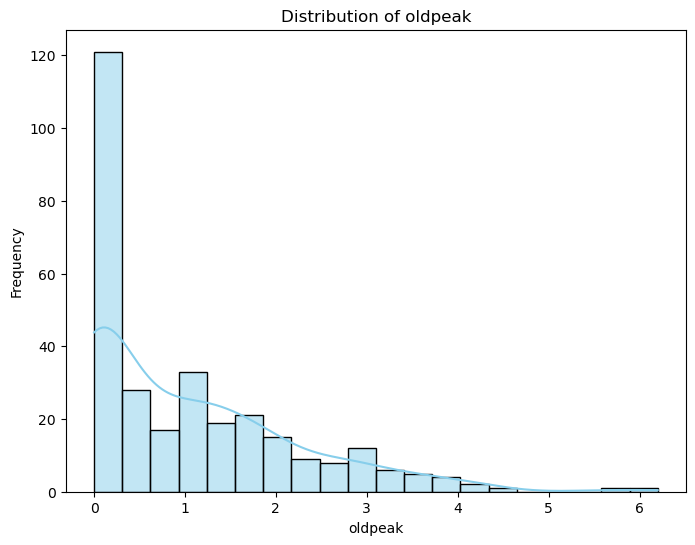

In [13]:
# List of variables to plot
variables = ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall',
             'age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Plotting each variable separately
for var in variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], kde=True, color='skyblue', bins=20)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

In [14]:
#pip install plotly


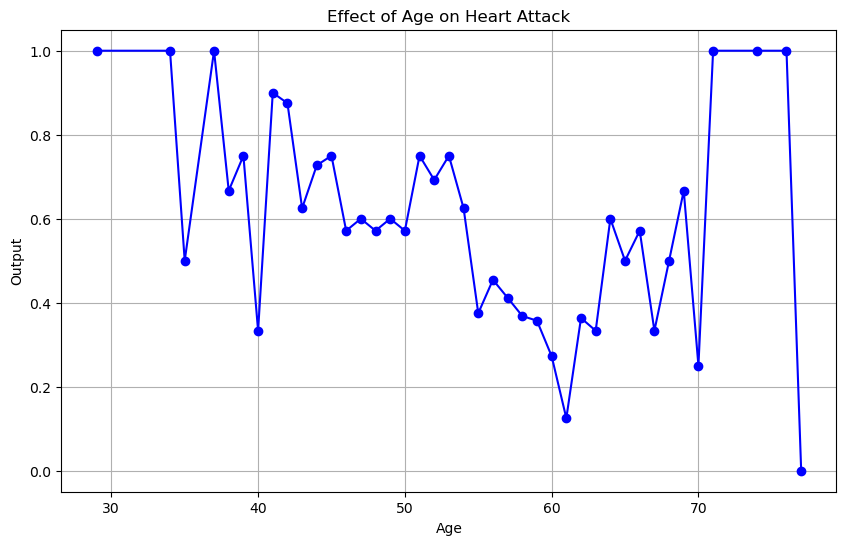

In [15]:
heart_mean = df.groupby('age')['output'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(heart_mean['age'], heart_mean['output'], marker='o', color='blue')
plt.title('Effect of Age on Heart Attack')
plt.xlabel('Age')
plt.ylabel('Output')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

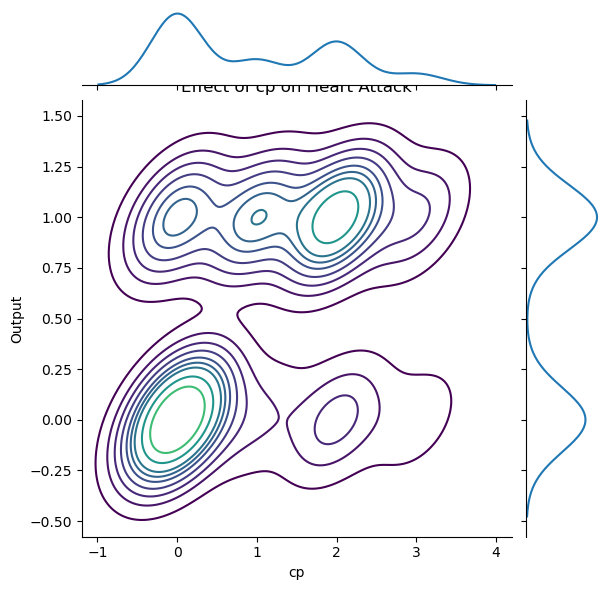

In [16]:
# Create a scatter plot with density estimation
plt.figure(figsize=(8, 6))
sns.jointplot(x='cp', y='output', data=df, kind='kde', cmap='viridis')
plt.title('Effect of cp on Heart Attack')
plt.xlabel('cp')
plt.ylabel('Output')
plt.show()


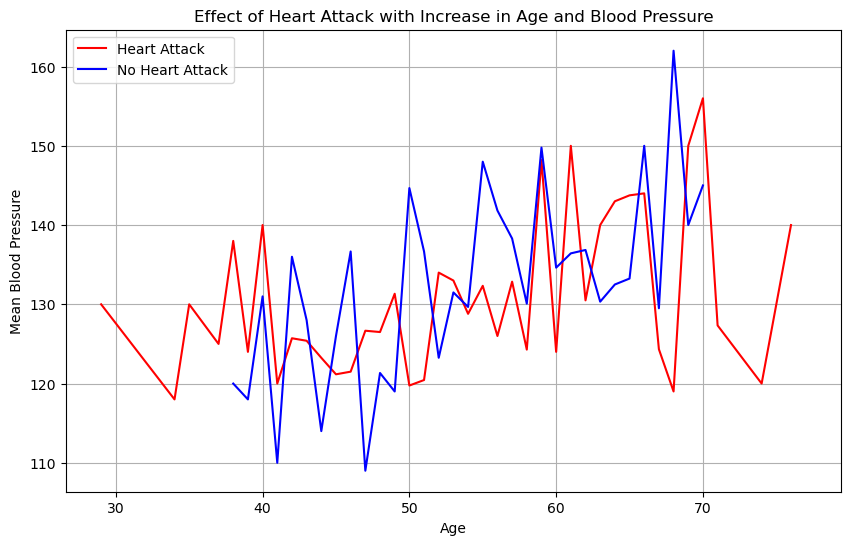

In [17]:
# Assuming 'heart' DataFrame is already defined
heart_agg = df.groupby(['age', 'output'])['trtbps'].mean().unstack().reset_index()

plt.figure(figsize=(10, 6))

# Plot lines for each 'output' category
plt.plot(heart_agg['age'], heart_agg[1], label='Heart Attack', color='red')
plt.plot(heart_agg['age'], heart_agg[0], label='No Heart Attack', color='blue')

plt.title('Effect of Heart Attack with Increase in Age and Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Mean Blood Pressure')
plt.legend()
plt.grid(True)

plt.show()

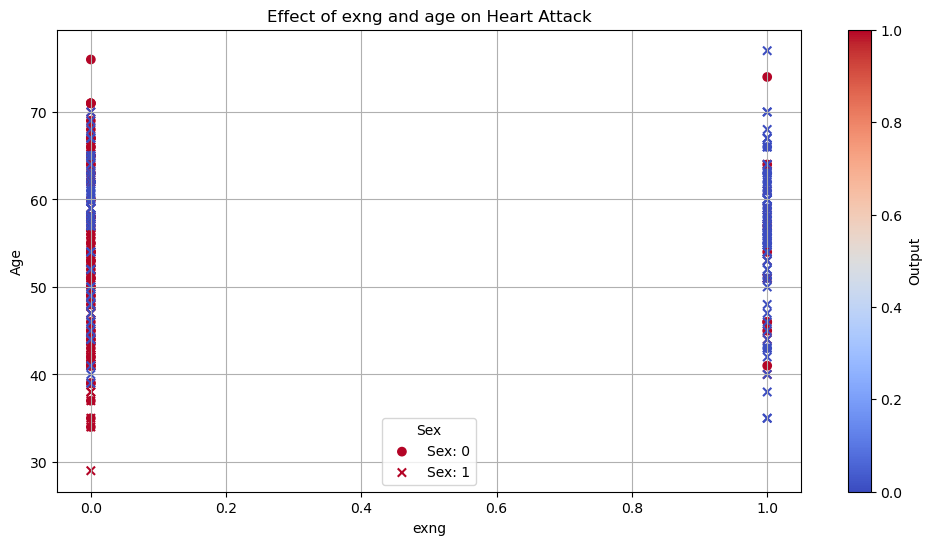

In [18]:
# Define markers for different output values
markers = {0: 'o', 1: 'x'}

# Create a scatter plot with separate panels for different sex values
plt.figure(figsize=(12, 6))
for sex_value, group in df.groupby('sex'):
    plt.scatter(group['exng'], group['age'], c=group['output'], cmap='coolwarm', marker=markers[sex_value], label=f'Sex: {sex_value}')

plt.title('Effect of exng and age on Heart Attack')
plt.xlabel('exng')
plt.ylabel('Age')
plt.legend(title='Sex')
plt.colorbar(label='Output')
plt.grid(True)
plt.show()

Data preparation

In [19]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [20]:
# Label encoding for Decission Trees 

from sklearn.preprocessing import LabelEncoder

# creating a copy of dataframe
heart_1 = df.copy()

# define the columns to be encoded
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']

# initialize LabelEncoder
label_encoder = LabelEncoder()

# label encode each categorical column
for col in cat_cols:
    heart_1[col] = label_encoder.fit_transform(heart_1[col])

# Displaying first few rows of modified DataFrame
print(heart_1.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [21]:
#Split the dataset and build the Decision Tree model

from sklearn.metrics import accuracy_score, classification_report

# Splitting the data into features (X) and target variable (y)
X = heart_1.drop('output', axis=1)  # Features
y = heart_1['output']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)

# Training the Decision Tree model
clf.fit(X_train, y_train)

# Predicting on the testing data
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7540983606557377

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61



In [22]:
# One-hot encoding for the rest of the models: LR,SVM,KNN,RFC

# creating a copy of dataframe
heart_2 = df

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
heart_1 = pd.get_dummies(heart_2, columns = cat_cols, drop_first = True)

# defining the features and target
X = heart_2.drop(['output'],axis=1)
y = heart_2[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.592593,1,3,0.75,-0.110236,1,0,-0.092308,0,0.9375,0,0,1
1,-1.333333,1,2,0.00,0.157480,0,1,1.046154,0,1.6875,0,0,2
2,-1.037037,0,1,0.00,-0.566929,0,0,0.584615,0,0.3750,2,0,2
3,0.074074,1,1,-0.50,-0.062992,0,1,0.769231,0,0.0000,2,0,2
4,0.148148,0,0,-0.50,1.795276,0,1,0.307692,1,-0.1250,2,0,2


In [23]:
"""it is important to maintain the proportion of positive (heart attack) and negative (no heart attack) 
cases in both the training and testing sets ensuring that the model learns from and is evaluated 
on a representative sample of the data. This promotes more reliable model training and evaluation, 
ultimately leading to better generalization performance when deployed in real-world scenarios. """

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, stratify = y, random_state= 10)

print('Shape for training data', X_train.shape, y_train.shape)
print('Shape for testing data', X_test.shape, y_test.shape)

Shape for training data (242, 13) (242, 1)
Shape for testing data (61, 13) (61, 1)


In [24]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

Logistic Regression

In [25]:
# instantiating the object and fitting
model = LogisticRegression()
model.fit(X_train, y_train)

# predicting the values
predicted=model.predict(X_test)

#Confusion matrix
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)

# printing the test accuracy
print ("The test accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[24  4]
 [ 4 29]]
The test accuracy of Logistic Regression is :  86.88524590163934 %


/opt/software/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Machines

In [26]:
# instantiating the object and fitting
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# predicting the values
svm_pred = clf.predict(X_test)

#Confusion matrix
svm_conf_matrix = confusion_matrix(y_test, svm_pred)
svm_acc_score = accuracy_score(y_test, svm_pred)
print("confusion matrix")
print(svm_conf_matrix)
print("\n")

# printing the test accuracy
print("The test accuracy of SVM is ", accuracy_score(y_test, svm_pred))


confusion matrix
[[24  4]
 [ 4 29]]


The test accuracy of SVM is  0.8688524590163934


/opt/software/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
# instantiating the object
knn = KNeighborsClassifier(n_neighbors=10)

# fitting the model
knn.fit(X_train, y_train)

# calculating the predictions
knn_pred = knn.predict(X_test)

#Confusion matrix
knn_conf_matrix = confusion_matrix(y_test, knn_pred)
knn_acc_score = accuracy_score(y_test, knn_pred)
print("confusion matrix")
print(knn_conf_matrix)
print("\n")

# printing the test accuracy
print(" The test accuracy of K-NeighborsClassifier is:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_pred))

confusion matrix
[[24  4]
 [ 3 30]]


 The test accuracy of K-NeighborsClassifier is: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.88      0.91      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



/opt/software/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [28]:
""" out of all the four models, Logitstic Regression gave the highest accuracy of 88%. 
So let's use Hyperparameter tuning to get the maximum accuracy."""

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# Create the logistic regression model
log_reg = LogisticRegression()

# Custom scoring function for accuracy
def custom_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    return accuracy_score(y, y_pred)

# Perform grid search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring=custom_scorer)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Retrain the model with the best hyperparameters
best_model = grid_search.best_estimator_

# Evaluate the final model
final_accuracy = best_model.score(X_test, y_test)
print(f"The Final Accuracy is: {final_accuracy:.4f}")
print(f"Best params: ", best_params)

/opt/software/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/software/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/software/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/software/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

The Final Accuracy is: 0.8852
Best params:  {'C': 0.1, 'penalty': 'l2'}
